## 1. Categories data

In [230]:
import os

In [231]:
root_imgs_path = "D:/image_retrieval_server/image_retrieval/static/img/"

In [232]:
dic_categories = {'scenery' : [], 'furniture' : [], 'animal' : [], 'plant' : []}

In [233]:
for path in os.listdir(root_imgs_path):
    c, name = path.split("_")
    if c in dic_categories.keys():
        dic_categories[c].append(name)

In [234]:
sum([len(dic_categories[c]) for c in dic_categories])

124

In [235]:
dic_categories

{'scenery': ['Bay',
  'cave',
  'Cliff',
  'cloud',
  'desert',
  'farmland',
  'flowergarden',
  'Forests',
  'glacier',
  'grassland',
  'horizon',
  'lighthouse',
  'Mountains',
  'river',
  'sky',
  'valley',
  'volcano',
  'waterfall'],
 'furniture': ['ball',
  'bed',
  'book',
  'Bookcase',
  'Bowl',
  'cabinet',
  'cart',
  'chair',
  'chests',
  'clock',
  'Clothes',
  'desks',
  'fridge',
  'pan',
  'Piano',
  'sofa',
  'spoon',
  'table',
  'Umbrella'],
 'animal': ['Alligator',
  'Alpaca',
  'Anteater',
  'Ants',
  'Bats',
  'bear',
  'Bee',
  'bird',
  'Buffalo',
  'Butterfly',
  'Camel',
  'Cat',
  'Caterpillar',
  'Cheetah',
  'Chicken',
  'Civet',
  'Cock',
  'Cockroaches',
  'Coral',
  'cows',
  'Crab',
  'Dog',
  'donkey',
  'Dragonfly',
  'Duck',
  'Elephant',
  'Fish',
  'flamingo',
  'Flies',
  'fox',
  'Frog',
  'Giraffe',
  'horse',
  'Jellyfish',
  'Lizard',
  'Monkey',
  'Mosquito',
  'Owl',
  'panda',
  'Pangolins',
  'pig',
  'Rabbit',
  'scorpion',
  'shrimp',

In [236]:
max_len = max([len(dic_categories[c]) for c in dic_categories])

In [237]:
max_len

50

In [238]:
for c in dic_categories:
    dic_categories[c] += [""]*(max_len - len(dic_categories[c]))

In [239]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 21.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [240]:
import pandas as pd
df = pd.DataFrame(dic_categories)

In [241]:
df.to_csv("categories.csv", index=False)

## 2. Preprocessing data

In [242]:
import os
from PIL import Image
import numpy as np
import warnings
warnings.filterwarnings("ignore", "(Possibly )?corrupt EXIF data", UserWarning)
Image.MAX_IMAGE_PIXELS = None

In [243]:
root_img_path = "D:/image_retrieval_server/image_retrieval/static/img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
count = 0

In [244]:
count

0

In [245]:
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        list_dir = [path + '/' + name for name in os.listdir(path) if name.endswith((".jpg", ".png", ".jpeg"))]
        for p in list_dir:
            try:
                im = Image.open(p)
                im.draft(im.mode, (32, 32))
                im.load()
                im._getexif()
                im.close()

            except:
                count += 1
                print("notread: ", p)
                # os.remove(p) # chú ý chỗ này, mới đầu chạy phải comment lại không lỡ lỗi mất hết ảnh

## 3. Offline Feature Extractor

In [317]:
import tensorflow as tf
from feature_extractor import FeatureExtractor
import os
import numpy as np
from tensorflow.keras.preprocessing import image as kimage



root_img_path = "D:/image_retrieval_server/image_retrieval/static/img/"
root_fearure_path = "D:/image_retrieval_server/image_retrieval/static/feature/file/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']



In [318]:
def folder_to_images(folder):
    
    list_dir = [folder + '/' + name for name in os.listdir(folder) if name.endswith((".jpg", ".png", ".jpeg"))]
    
    i = 0
    images_np = np.zeros(shape=(len(list_dir), 224, 224, 3))
    images_path = []
    for path in list_dir:
        try:
            img = kimage.load_img(path, target_size=(224, 224))
            images_np[i] = kimage.img_to_array(img, dtype=np.float32)
            images_path.append(path)
            i += 1
            
        except Exception:
            print("error: ", path)
    #         os.remove(root_img_path + img_path)

    images_path = np.array(images_path)
    return images_np, images_path

In [319]:
fe = FeatureExtractor()

In [320]:
# GPU: Wall time: 5min 31s
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        print(path)
        images_np, images_path = folder_to_images(path)
        np.savez_compressed(root_fearure_path+folder, array1=np.array(images_path), array2=fe.extract(images_np))


D:/image_retrieval_server/image_retrieval/static/img/animal_Alligator
D:/image_retrieval_server/image_retrieval/static/img/animal_Alpaca
D:/image_retrieval_server/image_retrieval/static/img/animal_Anteater
D:/image_retrieval_server/image_retrieval/static/img/animal_Ants
D:/image_retrieval_server/image_retrieval/static/img/animal_Bats
D:/image_retrieval_server/image_retrieval/static/img/animal_bear
D:/image_retrieval_server/image_retrieval/static/img/animal_Bee
D:/image_retrieval_server/image_retrieval/static/img/animal_bird
D:/image_retrieval_server/image_retrieval/static/img/animal_Buffalo
D:/image_retrieval_server/image_retrieval/static/img/animal_Butterfly
D:/image_retrieval_server/image_retrieval/static/img/animal_Camel
D:/image_retrieval_server/image_retrieval/static/img/animal_Cat
D:/image_retrieval_server/image_retrieval/static/img/animal_Caterpillar
D:/image_retrieval_server/image_retrieval/static/img/animal_Cheetah
D:/image_retrieval_server/image_retrieval/static/img/animal_Ch

In [ ]:
features = np.load("static/feature/features2_vgg19.npz")
img_paths = features["array1"]
features = np.reshape(features["array2"], (features["array2"].shape[0], -1))

In [ ]:
np.load('static/feature/animal_Alligator.npz')["array2"]

array([[4.93073881e-01, 1.90248108e+00, 3.57354462e-01, ...,
        9.49825197e-02, 2.78009232e-02, 1.88670725e-01],
       [5.90883195e-01, 6.99301511e-02, 4.76520538e-01, ...,
        2.90724784e-02, 2.44972616e-01, 7.67289639e-01],
       [9.05670077e-02, 2.71356523e-01, 6.34584367e-01, ...,
        8.62777084e-02, 1.22472364e-03, 5.53076625e-01],
       ...,
       [4.67808284e-02, 2.93712884e-01, 4.16327119e-01, ...,
        0.00000000e+00, 0.00000000e+00, 4.48476747e-02],
       [5.80374241e-01, 5.88356927e-02, 6.80332184e-01, ...,
        6.43056035e-02, 5.96572272e-02, 1.16068125e-02],
       [0.00000000e+00, 4.71559800e-02, 2.30811313e-01, ...,
        1.20310627e-01, 1.24529414e-01, 4.49670553e-01]], dtype=float32)

In [321]:
imgs_feature = []
paths_feature = []

In [322]:
for path in [root_fearure_path + path for path in os.listdir(root_fearure_path) if path.endswith(".npz")]:
    data = np.load(path)
    paths_feature.extend(data["array1"])
    imgs_feature.extend(data["array2"])

In [323]:
np.array(paths_feature).shape

(17066,)

In [324]:
np.array(imgs_feature).shape

(17066, 2048)

In [326]:
np.savez_compressed(root_fearure_path+"all_feartures", array1=np.array(paths_feature), array2=np.array(imgs_feature))

## 4. Check similarity with query_image

In [ ]:
pip install matplotlib


You are using pip version 18.1, however version 21.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/3e/59/4d519b49a5dfae6be2f445ac59802db54b4356cb20a4c3d1599c03d82f59/Pillow-8.4.0-cp37-cp37m-win_amd64.whl


In [327]:
import tensorflow as tf
from feature_extractor import FeatureExtractor
import os
import numpy as np
from tensorflow.keras.preprocessing import image as kimage
import matplotlib.pyplot as plt

In [328]:
folder_query = "D:/image_retrieval_server/image_retrieval/query_pic/"
root_fearure_path = "D:/image_retrieval_server/image_retrieval/static/feature/all_feartures.npz"

In [329]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [339]:
paths_feature

array(['static/img/animal_Alligator/0.0013723757927386337.jpg',
       'static/img/animal_Alligator/0.02325785296769156.jpg',
       'static/img/animal_Alligator/0.02547046199770242.jpg', ...,
       'static/img/scenery_waterfall/0.9975141776972539.jpg',
       'static/img/scenery_waterfall/0.9991506123412819.jpg',
       'static/img/scenery_waterfall/0.9996331777411684.jpg'],
      dtype='<U57')

In [331]:
fe = FeatureExtractor()

In [ ]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You are using pip version 18.1, however version 21.3 is available.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [332]:
from scipy.cluster.vq import vq, kmeans2
from scipy.spatial.distance import cdist

In [333]:
def cosine_similarity(query, X):
    norm_2_query = np.sqrt(np.sum(query*query))
    norm_2_X = np.sqrt(np.sum(X*X, axis=-1))
    return np.sum(query*X, axis=-1)/(norm_2_query*norm_2_X)

In [354]:
# def code_books(vectors, m_codebook = 2, K_cluster = 256, n_iter=20, minit='points', missing = 'warn', check_finite = True, seed=123):
#     _ , n_cols = vectors.shape
#     n_sub_cols = n_cols // m_codebook

#     np.random.seed(seed)
#     codebooks = np.zeros((m_codebook, K_cluster, n_sub_cols), dtype=np.float32)
#     for subspace in range(m_codebook):
#         sub_vec = vectors[:, m_codebook*n_sub_cols:(m_codebook+1)*n_sub_cols]
#         centroid, label = kmeans2(sub_vec, K_cluster, n_iter, minit=minit, missing = missing, check_finite = check_finite, seed = seed)
#         codebooks[subspace] = centroid

#     return codebooks
def compute_code_books(vectors, sub_size=2, n_cluster=128, n_iter=20, minit='points', seed=123):
    n_rows, n_cols = vectors.shape
    n_sub_cols = n_cols // sub_size

    np.random.seed(seed)
    code_books = np.zeros((sub_size, n_cluster, n_sub_cols), dtype=np.float32)
    for subspace in range(sub_size):
        sub_vectors = vectors[:, subspace * n_sub_cols:(subspace + 1) * n_sub_cols]
        centroid, label = kmeans2(sub_vectors, n_cluster, n_iter, minit=minit)
        code_books[subspace] = centroid

    return code_books

In [355]:
def encode(vectors, code_books):
    n_rows, n_cols = vectors.shape
    sub_size = code_books.shape[0]
    n_sub_cols = n_cols // sub_size

    codes = np.zeros((n_rows, sub_size), dtype=np.int32)
    for subspace in range(sub_size):
        sub_vectors = vectors[:, subspace * n_sub_cols:(subspace + 1) * n_sub_cols]
        code, dist = vq(sub_vectors, code_books[subspace])
        codes[:, subspace] = code

    return codes


In [388]:
def query_dist_table(query, code_books):
    sub_size, n_cluster, n_sub_cols = code_books.shape

    dist_table = np.zeros((sub_size, n_cluster))
    for subspace in range(sub_size):
        sub_query = query[subspace * n_sub_cols:(subspace + 1) * n_sub_cols]

        diff = code_books[subspace] - sub_query.reshape(1, -1)
        diff = np.sum(diff ** 2, axis=1)
        dist_table[subspace, :] = diff

    return dist_table

In [389]:
M = 16  # M sub-vector
codebooks = compute_code_books(imgs_feature, M, 256)  
pqcode = encode(imgs_feature, codebooks) 
dist_table = query_dist_table(query_vector, codebooks)

In [390]:
# lookup the distance
dists = np.sum(dist_table[range(M), pqcode], axis=1)
# the numpy indexing trick is equivalent to the following loop approach
n_rows = pqcode.shape[0]
dists = np.zeros(n_rows).astype(np.float32)
for n in range(n_rows):
    for m in range(M):
        dists[n] += dist_table[m][pqcode[n][m]]

In [391]:
# find the nearest neighbors and "translate" it to the original labels
k = 30
nearest = np.argsort(dists)[:k]
nearest

array([6176, 6181, 6252, 6229, 6260, 6170, 6228, 6163, 6236, 6182, 6208,
       6248, 6157, 6223, 6234, 6250, 6207, 6205, 6257, 6217, 6226, 6256,
       6158, 6203, 6196, 6201, 6197, 6225, 6169, 6211], dtype=int64)

In [340]:
imgs_feature.shape

(17067, 2048)

In [392]:
# def retrieval_images(query_vector, k):
#     # caculate similarity between query and features in database
#     dist, I = index.search(query_vector, k)
#     rates = dist.reshape(-1)
#     id_s = np.argsort(-rates)[:30] # Top 30 results
    
#     return [(rates[id], paths_feature[id]) for id in id_s]

# def retrieval_images(query_vector, imgs_feature):
#     # caculate similarity between query and features in database
#     rates = query(query_vector)
#     id_s = np.argsort(-rates)[:30] # Top 30 results
    
#     return [(rates[id], paths_feature[id]) for id in id_s]
def retrieval_images():
    return [(dists[id], paths_feature[id]) for id in nearest]


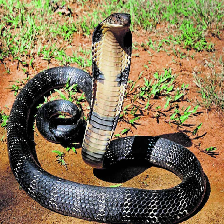

In [ ]:
query

In [ ]:
data = retrieval_images(query_vector, imgs_feature)

In [ ]:
data

[(0.6776163, 'static/img/animal_Snake/0.1593470776253122.jpg'),
 (0.6740635, 'static/img/animal_Snake/0.6653656719728656.jpg'),
 (0.66729575, 'static/img/animal_Snake/0.9210026674110734.jpg'),
 (0.65601736, 'static/img/animal_Snake/0.18888767023211406.jpg'),
 (0.6227055, 'static/img/animal_Snake/0.17618603339281702.jpg'),
 (0.6129592, 'static/img/animal_Snake/0.3571705778283597.jpg'),
 (0.5985095, 'static/img/animal_Snake/0.003868794598069991.jpg'),
 (0.5910323, 'static/img/animal_Snake/0.3212057569868352.jpg'),
 (0.58286375, 'static/img/animal_Snake/0.6227141634826532.jpg'),
 (0.57830185, 'static/img/animal_Snake/0.27751590130381376.jpg'),
 (0.577579, 'static/img/animal_Snake/0.11929314753693254.jpg'),
 (0.57708234, 'static/img/animal_Snake/0.9339139780866857.jpg'),
 (0.57159895, 'static/img/animal_Snake/0.8602635234741092.jpg'),
 (0.5711132, 'static/img/animal_Snake/0.09353680689113375.jpg'),
 (0.56288445, 'static/img/animal_Snake/0.05821054331242781.jpg'),
 (0.5606928, 'static/img/a

In [ ]:
os.listdir(folder_query)

['0 (1).jpg',
 '0 (1).png',
 '0 (10).jpg',
 '0 (11).jpg',
 '0 (12).jpg',
 '0 (13).jpg',
 '0 (14).jpg',
 '0 (15).jpg',
 '0 (2).jpg',
 '0 (2).png',
 '0 (3).jpg',
 '0 (4).jpg',
 '0 (4).png',
 '0 (5).jpg',
 '0 (6).jpg',
 '0 (7).jpg',
 '0 (8).jpg',
 '0 (9).jpg']

In [ ]:
queries = os.listdir(folder_test)

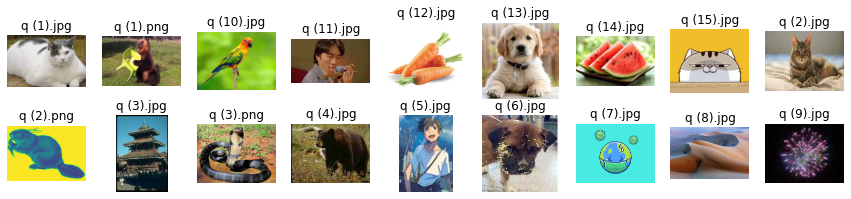

In [ ]:
fig = plt.figure(figsize=(15, 15))
columns = len(queries)//2
rows = len(queries) - len(queries)//2
for i, path in enumerate(queries, 1):
    fig.add_subplot(rows, columns, i)
    plt.title(path)
    plt.imshow(plt.imread(folder_query + path))
    plt.axis("off")
plt.show()

In [380]:
query_path = "D:/image_retrieval_server/image_retrieval/query_pic/q (3).png"
query = kimage.load_img(query_path, target_size=(224, 224))

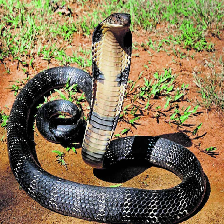

In [381]:
query

In [385]:
query = kimage.img_to_array(query, dtype=np.float32)
# extract feature of query image
query_vector = fe.extract(query[None, :]).flatten()

In [383]:
query_vector.shape

(2048,)

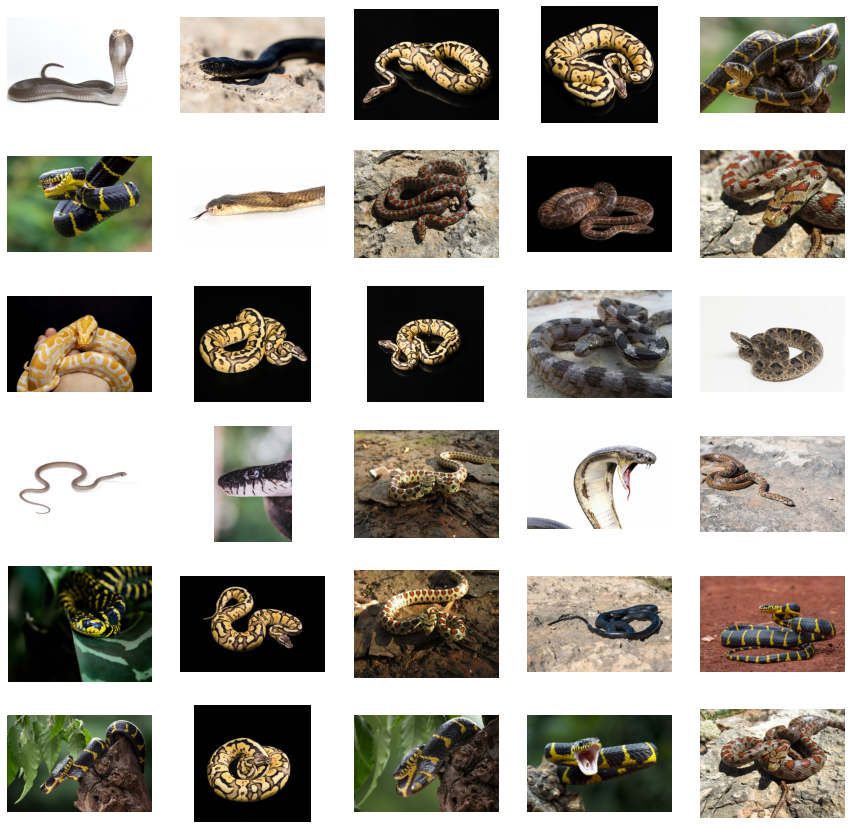

In [393]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(np.array(retrieval_images())[:, 1], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path))
    plt.axis("off")
plt.show()